In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import warnings

warnings.filterwarnings("ignore")


# Cancelamentos de Reservas

https://www.kaggle.com/competitions/ih-hotel-booking

In [2]:
tb_hotel = pd.read_csv("data/tb_hotel_traintest.csv")


* **hotel** - (str) Tipo de hotel.
* **is_cancelled** - (binary) Variável binária indicando cancelamento da reserva (0 = não cancenlada, 1 = cancelada) - variável resposta do case.
* **lead_time** - (int) Número de dias entre data da reserva e data de entrada no hotel (quando a reserva foi feita).
* **arrival_date** - (date) Data de entrada no hotel (para quando a reserva é).
* **stays_in_weekend_nights** - (int) Número de dias em finais de semana na reserva.
* **stays_in_week_nights** - (int) Número de dias de semana na reserva.
* **adults** - (int) Número de adultos.
* **children** - (int) Número de crianças.
* **babies** - (int) Número de bebes.
* **meal** - (str) Tipo de refeição inclusa na reserva.
* **country** - (str) País do cliente.
* **market_segment** - (str) Segmentação de marketing do cliente.
* **distribution_channel** - (str) Canal de vendas pelo qual a reserva foi feita.
* **is_repeated_guest** - (binary) O cliente já ficou hospedado no hotel? (0 = não, 1 = sim).
* **previous_cancellations** - (int) Quantas reservas o cliente já cancelou no passado.
* **previous_bookings_not_canceled** - (int) Quantas reservas o cliente já fez e não cancelou no passado.
* **reserved_room_type** - (str) Tipo de quarto desejado.
* **assigned_room_type** - (str) Tipo de quarto reservado.
* **booking_changes** -  (str) Número de mudanças na reserva entre data de reserva e entrada/cancelamento.
* **deposit_type** - (str) Tipo de adiantamento feito no momento da reserva.
* **agent** - (str) ID do Agente que fez a reserva (NA caso a reserva não tenha sido feita por um agente).
* **company**  - (str) ID da empresa que fez a reserva (NA caso a reserva não seja corporativa)
* **days_in_waiting_list** - (int) Quantos dias demorou a confirmação da reserva.
* **customer_type** - (str) Tipo de reserva.
* **adr** - (float) Average Daily Rate, preço médio de cada diária na reserva.
* **required_car_parking_spaces** - (int) Número de vagas em estacionamento requisitadas na reserva.
* **total_of_special_requests** - (int) Número de requisições especiais na reserva (cama dupla, andar, quarto com vista...)
* **reservation_status_date** - (date) Data da última atualização feita na reserva.

In [32]:
tb_hotel.head()


,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,3
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01,4


In [33]:
profile = ProfileReport(
    tb_hotel[["lead_time", "adults"]], title="Pandas Profiling Report", explorative=True
)
profile.to_widgets()


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/multimethod/__init__.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Generate report structure: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


# Goal – Predictive Analytics

## Definition

In this stage we ask you to pick the booking dataset notebook you previously worked on and perform feature engineering and feature selection so that the dataset is ready for binary model classification training that furthermore be able to predict correctly if a booking instance will be cancelled or not.
Requirements:
- Feature engineering | Examples:
    - Combine features
    - Feature scaling transformations
    - Binarizations
- Feature selection
- Predictive model implementation
- Setup data splits (train/test)
- Experiment at least 2 models
    - What are their advantages?
    - What are their disadvantages?
- Evaluate models performance and implement other classification metrics
- Briefly explain their meaning
- Write notes explaining your decisions

## Deliverable

The main output of this stage is a prediction analytics notebook of a hotel bookings dataset with the aim of booking churn predictions. Notes must be included which explains your critical thinking and assumptions.

# Etapas de Construção de um Modelo

Antes de seguir em frente com a atividade vamos relembrar as etapas para construir um modelo!

## Leitura de dados

A primeira etapa na construção de qualquer modelo é a obtenção dos dados. Isso pode ser *tão simples quanto carregar um dataset* da SKLEARN ou *tão complexo quanto construir um webscrapper*. 

No exemplo de hoje estaremos trabalhando sobre uma tabela disponibilizada em CSV. O checklist abaixo pode guia-lo no processo de carregar e validar a entrada de dados:

- **Ler arquivo .csv para um DataFrame pandas**
- **Validar número de colunas**
- **Validar e tratar tipo das colunas** (principalmente datas através da função pd.to_datetime)
- **Ler mapa de dados** (caso seja disponibilizado) para entender o que cada coluna representa.

## EDA (Análise Exploratória de Dados)

A segunda etapa na construção de um modelo é a análise exploratória de dados. Neste momento buscamos *entender* o nosso conjunto de dados através de gráficos e tabelas que resumam a relação entre as diversas variáveis.

Vamos relembrar dos objetivos dessa etapa:

- **Avaliação de problemas nos dados** (missing value e informações incorretas)
    - **Ferramentas:** .info, .describe, .head, mapa de dados
- **Familiarização com o conteúdo de cada variável**
    - **Ferramentas:** boxplots e histogramas, tabelas de contagem, pandas-profiling
- **Mapeamento das relações entre meus features e minha variável resposta**
    - **Ferramentas:** scatterplots e pairplots, .groupby, .pivot_table, PCA 
- **Feature Engineering** para criar novas variáveis
    - **Ferramentas:** PCA, np.log, .qcut e .cut, np.where e .loc
    - *Feature engineering é um dos aspectos mais complexos e impactantes* na construção de um modelo. As transformações mais comuns são as transformações numéricas (como o log), a discretização de variáveis continuas (através de cut, qcut ou np.where), a aglomeração de categorias, a binarização de variáveis continuas e categóricas.
    
Nesta etapa devemos investir tempo em tentar **ENTENDER O PROBLEMA**:

- *Qual é o fenômeno que queremos modelar*?
- *Sem considerar os dados, o que, conceitualmente, impacta minha variável resposta?*
- *Considerando os dados, quais variáveis representam bem esses conceitos?*

No entanto, devemos estar atentos ao **tempo disponível** para resolvermos o problema! Qualquer modelo pode ser melhorado se investirmos mais tempo nele, logo o tempo disponível é uma pré-condição do erro que iremos obter. O **processo de modelagem é iterativo** e a construção de modelos simples e imprecisos é uma etapa importante na construção de modelos complexos.

Embora o principal resultado de uma análise exploratória seja o *aprofundamento do nosso conhecimento* sobre o problema, na prática também devemos obter um **FEATURE SET**, um conjunto de variáveis de entrada sobre o qual construíremos nossos modelos. Uma vez que tenhamos este feature set podemos dividi-lo em conjunto de treinamento e um de teste - sempre prestando atenção nos problemas de **leakage**:

- Caso o nosso feature set contenha transformações que sejam calculadas a partir dos dados (por exemplo normalização ou PCA) devemos construir estes transformadores utilizando apenas o conjunto train e então aplica-los ao conjunto teste.
- Muitas vezes algumas variáveis de uma tabela podem ser contaminadas: por exemplo, em um problema de previsão binária de chuva não podemos utilizar a variável mm/h de chuva. Uma forma simples de tratar isso é se perguntar: terei esta variável no momento da previsão?

## Modelo Baseline

Os modelos de baseline são modelos simples (do ponto de vista matemático) que fornecem um erro base que tentaremos melhorar através da utilização de algoritmos mais sofisticados. Como vimos, muitos algoritmos tem hiperparâmetros que são criticos na construção de um modelo. A utilização de modelos simples nos dá um valor de comparação para avaliarmos os primeiros hiperparâmetros que testarmos.

Dois modelos são comumemnte utilizados como baseline preditivo:

- **Regressão logística**
- **1-NN (kNN com n-neighbors = 1)**

A *regressão logística é um modelo linear*, sem nenhum hiperparâmetro, ou seja, o resultado da regressão em si é fruto apenas das variáveis de entrada escolhidas.

Além da simplicidade, **ela é uma ferramenta investigativa interessante** - possibilitando mapear os efeitos de variáveis específicas dentro de um feature set: como vimos a **colinearidade entre variáveis de entrada altera o impacto** que cada uma tem quando as consideramos conjuntamente. **A regressão nos permite desembaraçar estes efeitos!** Podemos utilizar simulações como vimos em aula para aumentar nossa compreensão do feature set escolhido.

A grande limitação da regressão logística é a linearidade: muitas vezes a estimativa de erro da regressão será bem pessimista. **Para ter uma idéia da performance esperada de algoritmos não-lineares podemos utilizar o modelo 1-NN**. 

## Modelo Final

Armados com uma estimativa de erro inicial, podemos prosseguir para a implantação de modelos utilizando algoritmos mais complexo, como árvores de decisão ou métodos de ensemble. Nessa etapa é crítico lembrar que estes algoritmos tem **hiperparâmetros que são determinantes em sua performance**. 

Podemos utilizar o **GridSearchCV** para encontrar os hiperparâmetros ótimos de um dado algoritmo, mas esse processo é custoso. Então vale a pena testar alguns valores bem separados para entender em que região cada hiperparâmetro parece funcionar melhor.

Ao final desta etapa teremos uma avaliação de erro sobre nosso conjunto teste e devemos fazer uma submissão à competição :)

**Agora, armados com todo o conhecimento que a construção dos modelos nos deu, podemos voltar à etapa de EDA para adicionar novos features, pensar em novos dados, enfim, recomeçar o processo, só que desta vez não do zero!**

# (Uma) Solução Case Hotel

## Data Load/Transform

In [3]:
def transform_data(tb_hotel):
    tb_hotel["arrival_date"] = pd.to_datetime(tb_hotel["arrival_date"])
    tb_hotel["arrival_date_month"] = tb_hotel["arrival_date"].dt.month
    tb_hotel["arrival_date_year"] = tb_hotel["arrival_date"].dt.year
    tb_hotel["is_agent"] = np.where(tb_hotel["agent"].isna(), False, True)
    tb_hotel["is_company"] = np.where(tb_hotel["company"].isna(), False, True)
    tb_hotel["log_lead_time"] = np.log(tb_hotel["lead_time"] + 1)
    tb_hotel["reservation_type"] = np.where(
        (tb_hotel["lead_time"] + 1) < 10, "last_minute", "scheduled"
    )
    tb_hotel = tb_hotel.drop(["company", "agent"], axis=1)
    tb_hotel = tb_hotel.dropna()
    return tb_hotel


def create_country_agg(tb_hotel_trans):
    train_data = tb_hotel_trans.copy()
    train_data["n_rows_country"] = train_data.groupby(["country"])["country"].transform(
        "count"
    )
    train_data["grouped_country"] = np.where(
        train_data["n_rows_country"] < 5000, "other", train_data["country"]
    )
    tb_depara_country = (
        train_data.groupby(["country", "grouped_country"]).count().reset_index()
    )
    return tb_depara_country[["country", "grouped_country"]]


def create_season(tb_hotel_trans, depara_country):
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(depara_country, on="country")
    table = (
        train_data.groupby(
            ["grouped_country", "arrival_date_year", "arrival_date_month"]
        )
        .agg(
            n_cancelled=pd.NamedAgg("is_cancelled", "sum"),
            n_reservas=pd.NamedAgg("is_cancelled", "count"),
        )
        .reset_index()
    )
    table["n_total"] = table["n_reservas"] - table["n_cancelled"]
    table["country_year_total"] = (
        table.groupby(["grouped_country", "arrival_date_year"])["n_total"].transform(
            "sum"
        )
    ) / 12
    table["season_index"] = table["n_total"] / table["country_year_total"]
    table["high_season"] = np.where(table["season_index"] < 1, 0, 1)
    table_agg = (
        table.sort_values(["grouped_country", "arrival_date_year"])
        .groupby(["grouped_country", "arrival_date_month"])
        .agg(
            n_high=pd.NamedAgg("high_season", "sum"),
            n_total=pd.NamedAgg("high_season", "count"),
        )
        .reset_index()
    )
    table_agg["high_season"] = np.where(
        table_agg["n_high"] >= table_agg["n_total"], 1, 0
    )
    table_agg = table_agg[["grouped_country", "arrival_date_month", "high_season"]]
    return table_agg


def transform_country(tb_hotel_trans, tb_depara_country, tb_season):
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(tb_depara_country, on="country")
    train_data = train_data.merge(
        tb_season, on=["grouped_country", "arrival_date_month"]
    )
    return train_data


In [4]:
N = tb_hotel.shape[0]
p = 0.75
test_mask = np.random.choice(a=[False, True], size=N, p=(p, 1 - p))
train_tb_hotel = tb_hotel[~test_mask].copy()
test_tb_hotel = tb_hotel[test_mask].copy()


In [5]:
train_tb_hotel_t = transform_data(train_tb_hotel)
test_tb_hotel_t = transform_data(test_tb_hotel)
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel_t, tb_gc, tb_season)
test_tb_hotel_f = transform_country(test_tb_hotel_t, tb_gc, tb_season)


## Regressão logística

Optimization terminated successfully.
         Current function value: 0.596488
         Iterations 6


<AxesSubplot:xlabel='log_lead_time', ylabel='pred_m1'>

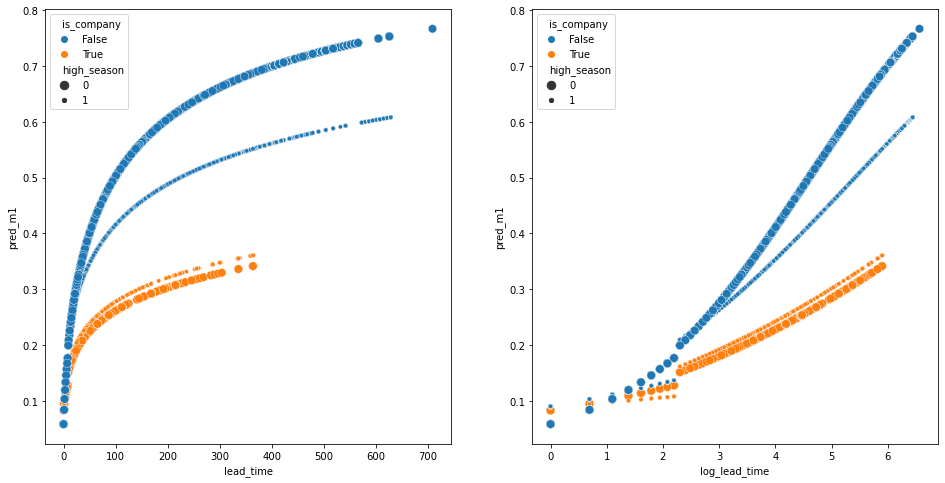

In [8]:
import statsmodels.formula.api as fsm
import seaborn as sns
import matplotlib.pyplot as plt

model = fsm.logit(
    formula="is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
fit = model.fit()
fit.summary()
train_tb_hotel_f["pred_m1"] = fit.predict()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(
    data=train_tb_hotel_f,
    x="lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[0],
)
sns.scatterplot(
    data=train_tb_hotel_f,
    x="log_lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[1],
)


In [9]:
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score


In [10]:
y_train, X_train = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
y_test, X_test = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=test_tb_hotel_f,
)
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)


LogisticRegression()

In [11]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.5720758516529619
Recall: 0.3221203817443069
F1-Score: 0.41216297908354493


A precisão está bem mais alta que o recall, talvez possamos sacrifica-la um pouco alterando o threshold para obter um F1 melhor

Text(0.5, 1.0, 'Best Threshold: 0.27 w/ F-1: 0.6')

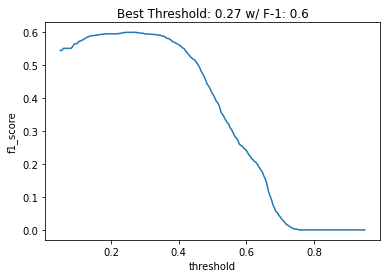

In [12]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
sns.lineplot(data=df_f1, x="threshold", y="f1_score").set_title(title)


## 1NN

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.42788268380875855
Recall: 0.7044316356420675
F1-Score: 0.532385917303435


## Floresta Aleatória

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
stump_fit = RandomForestClassifier(
    n_estimators=1000, max_depth=1, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)


RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=1000)

In [18]:
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.4514486892811266
Recall: 0.8966266654067845
F1-Score: 0.600531611923296


## EDA II

Este modelo inicial apresentou uma performance razoável a partir de um feature set bem pequeno. No entanto não consideramos muitas das variáveis categóricas que o dataset nos fornece.

In [19]:
from sklearn.feature_selection import chi2


In [20]:
train_tb_hotel_f.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84626 entries, 0 to 84625
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84626 non-null  object        
 1   is_cancelled                    84626 non-null  int64         
 2   lead_time                       84626 non-null  int64         
 3   stays_in_weekend_nights         84626 non-null  int64         
 4   stays_in_week_nights            84626 non-null  int64         
 5   adults                          84626 non-null  int64         
 6   children                        84626 non-null  float64       
 7   babies                          84626 non-null  int64         
 8   meal                            84626 non-null  object        
 9   country                         84626 non-null  object        
 10  market_segment                  84626 non-null  object        
 11  di

In [21]:
cat_train_tb_hotel_f = train_tb_hotel_f.select_dtypes("object")
cat_train_tb_hotel_f = cat_train_tb_hotel_f.drop(
    ["reservation_status_date", "country"], axis=1
)


In [22]:
dummies_train_tb_hotel_f = pd.get_dummies(cat_train_tb_hotel_f)


In [23]:
chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, train_tb_hotel_f["is_cancelled"])


<AxesSubplot:xlabel='p_rank', ylabel='p_value'>

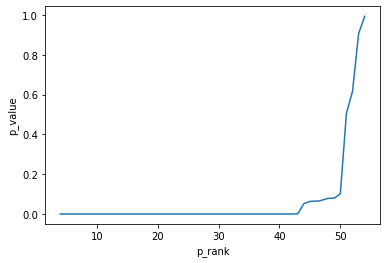

In [24]:
cat_imp = pd.DataFrame(
    {"cat_value": dummies_train_tb_hotel_f.columns, "p_value": p_hotel}
)
cat_imp["p_rank"] = cat_imp["p_value"].rank()
sns.lineplot(data=cat_imp, x="p_rank", y="p_value")


Como podemos ver no gráfico acima, algumas variáveis categóricas tem impactos muito relevantes sobre nossa variável resposta. No entanto, ainda temos muitas variáveis (mais que 40). Como essas variáveis são binárias, é muito dificil visualizar a estrura de correlação entre elas diretamente para tratar possíveis colinearidades. Podemos utilizar uma técnica de redução dimensional para tratar desse problema!

Com o que aprendemos até agora poderíamos utilizar PCA para reduzir essas categorias à um conjunto de variáveis menor. Embora isso não seja errado, podemos utilizar uma técnica semelhante à PCA mas mais adequada à variáveis binárias ou de contagem (variáveis não-negativas): NMF (fatorização de matrizes não-negativas).

In [25]:
# Importando NMF da SKLEARN
from sklearn.decomposition import NMF


Agora vamos criar um DataFrame apenas com as variáveis que selecionamos usando o método de Chiˆ2

In [26]:
imp_dum = dummies_train_tb_hotel_f[
    cat_imp.loc[cat_imp["p_value"] < 0.01, "cat_value"].to_list()
]


Ao contrário de PCA, onde podemos utilizar a `explained_variance_ratio_` para calcular o número de componentes que queremos manter, não temos em NMF uma forma direta de estimar este número.

Vamos utilizar um método simples para realizar essa estimativa:
1. Primeiro vamos inicializar NMF com `i` componentes.
1. Utilizamos o método `fit_transform` do objeto `nmf_fit` para fittar e calcular a projeção da nossa tabela `imp_dum`, guardando este resultado na matriz `nmf_decomp`.
1. Separamos nosso conjunto de treinamento novamente em train e test.
1. Utilizamos o resultado da transformação em uma regressão logística e calculamos o F1-score.
1. Repetimos esse processo de **i = 1 à i = 19**.
1. **Selecionamos o i que nos de a melhor regressão.**

In [27]:
for i in range(1, 20):
    nmf_fit = NMF(
        beta_loss="kullback-leibler", solver="mu", n_components=i, init="nndsvdar"
    )

    nmf_decomp = nmf_fit.fit_transform(imp_dum)
    X_train, X_test, y_train, y_test = train_test_split(
        nmf_decomp, train_tb_hotel_f["is_cancelled"], test_size=0.2
    )

    log_nmf_fit = LogisticRegression()
    log_nmf_fit.fit(X_train, y_train)
    result = f1_score(y_test, log_nmf_fit.predict(X_test))
    print(f"{i} NMF: F1 = {round(result, 2)}")


1 NMF: F1 = 0.0
2 NMF: F1 = 0.0
3 NMF: F1 = 0.53
4 NMF: F1 = 0.5
5 NMF: F1 = 0.62
6 NMF: F1 = 0.61
7 NMF: F1 = 0.61
8 NMF: F1 = 0.59
9 NMF: F1 = 0.57
10 NMF: F1 = 0.62
11 NMF: F1 = 0.59
12 NMF: F1 = 0.59
13 NMF: F1 = 0.56
14 NMF: F1 = 0.56
15 NMF: F1 = 0.56
16 NMF: F1 = 0.54
17 NMF: F1 = 0.55
18 NMF: F1 = 0.55
19 NMF: F1 = 0.55


Essa rotina produziu uma regressão com F1 de 0.6! Vamos funcionaliza-la e incorporar ao nosso modelo. Embora a função `pd.get_dummies` seja prática, por manter o nome das colunas intacto, para tarefas automatizadas o OneHotEncoder, da `sklearn.preprocessing`, é mais indicado: a `get_dummies` cria colunas para cada nível de categoria visto enquanto a `OneHotEncoder` cria sempre as mesmas colunas (mesmo que um nível não esteja presente ou que novos níveis apareçam).

In [28]:
from sklearn.preprocessing import OneHotEncoder


In [34]:
# O CAT_VAR_SET é o conjunto de variáveis categóricas que vamos utilizar.
# Inicializado aqui como uma variável global para possibilitar alterações futuras nesse conjunto.
CAT_VAR_SET = [
    "hotel",
    "meal",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    "reservation_type",
    "grouped_country",
]


def create_relevant_set(hotel_data, p_value_chi=0.2):
    """
    Cria o OneHotEncoder (uniformizando os níveis de cada categoria a partir daquilo observado no train set)
    e retorna o objeto ohe_fit (contendo o encoder) e a lista imp_dum, com o nome das colunas dummies
    que se mostraram relevantes através do chi2. Podemos alterar o parâmetro p_value_chi para escolher
    diferentes níveis de relevância.
    """
    global CAT_VAR_SET

    cat_train_tb_hotel_f = hotel_data[CAT_VAR_SET]
    ohe_fit = OneHotEncoder(handle_unknown="ignore")
    dummies_train_tb_hotel_f = ohe_fit.fit_transform(cat_train_tb_hotel_f)
    chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, hotel_data["is_cancelled"])
    cat_imp = pd.DataFrame(
        {"cat_value": ohe_fit.get_feature_names_out(), "p_value": p_hotel}
    )
    imp_dum = cat_imp.loc[cat_imp["p_value"] < p_value_chi, "cat_value"].to_list()
    return ohe_fit, imp_dum


def estimate_nmf(hotel_data):
    """
    Cria o NMF a partir dos dados hotel_data. Retorna o objeto NMF resultado do fit, o encoder e a lista de
    variáveis importantes. Para criar o encoder e a lista de variáveis utilizamos a função create_relevant_set.
    Utilizamos a rotina que desenvolvemos na etapa acima para estimar o melhor número de componentes para o nmf_fit.
    """
    global CAT_VAR_SET
    ohe_fit, imp_var = create_relevant_set(hotel_data)
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    f1_score_list = []
    for i in range(1, 6):
        nmf_fit = NMF(
            beta_loss="kullback-leibler", solver="mu", n_components=i, init="nndsvda"
        )
        nmf_decomp = nmf_fit.fit_transform(tb_imp_cat)
        X_train, X_test, y_train, y_test = train_test_split(
            nmf_decomp, train_tb_hotel_f["is_cancelled"], test_size=0.2
        )
        log_nmf_fit = LogisticRegression()
        log_nmf_fit.fit(X_train, y_train)
        n_score = f1_score(y_test, log_nmf_fit.predict(X_test))
        print(f"N Comp.: {i} F1: {n_score}")
        f1_score_list.append(n_score)
    best_n = np.argmax(np.array(f1_score_list))
    print(f"Best N: {best_n + 1}")
    nmf_fit = NMF(
        beta_loss="kullback-leibler",
        solver="mu",
        n_components=best_n + 1,
        init="nndsvda",
    )
    nmf_fit.fit(tb_imp_cat)
    return ohe_fit, imp_var, nmf_fit


def project_nmf(ohe_fit, imp_var, nmf_fit, hotel_data):
    """
    Projeta, a partir de um encoder, uma lista de variáveis importantes e um NMF fit, os componentes do NMF.fit
    Separar a etapa de treinamento da etapa de transformação do NMF é importante para que não tenhamos leakage,
    treinando o NMF a partir do conjunto de dados total. Essa função retorna os dados alimentados através do
    hotel_data enriquecidos com os componentes estimados pelo NMF.
    """
    # Primeiro usamos o OneHotEncoder para calcular as variáveis dummies do nosso CAT_VAR_SET
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    # Transformamos o resultado em um DataFrame para conseguirmos filtrar as colunas
    # pelo nome contido na lista imp_var
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    # Transformamos a tabela resultante utilizando o nmf_fit, guardando o resultado
    # em um dataframe
    tb_nmf_fit = pd.DataFrame(
        nmf_fit.transform(tb_imp_cat),
        columns=["C" + str(i) for i in range(nmf_fit.n_components_)],
    )
    final_data = pd.concat([hotel_data, tb_nmf_fit], axis=1)
    return final_data


Nossas funções nos permitem estimar o NMF a partir do conjunto train e utiliza-lo para projetar os componentes tanto do conjunto train quanto do conjunto teste de forma independente, evitando qualquer problema de leakage possível.

In [35]:
# Primeiro vamos fitar o encoder, estimar as variáveis importantes e fitar o NMF
# utilizando nossa função estimate_nmf
ohe_fit, imp_var, nmf_fit = estimate_nmf(train_tb_hotel_f)


N Comp.: 1 F1: 0.0
N Comp.: 2 F1: 0.0
N Comp.: 3 F1: 0.5117621337997378
N Comp.: 4 F1: 0.5094447624499142
N Comp.: 5 F1: 0.5878499106611078
Best N: 5


In [36]:
# Agora vamos utilizar os objetos fitados para projetar os componentes para os conjuntos de train e test.
train_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, train_tb_hotel_f)
test_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, test_tb_hotel_f)


## Regressão logística II
Com nossos dados enriquecidos podemos testar os modelos que utilizamos anteriormente, utilizando os novos componentes para representar a informação presente nas variáveis categóricas.

In [38]:
model_desc = "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season + C0 + C1 + C2 + C3 + C4"
y_train, X_train = patsy.dmatrices(
    model_desc,
    data=train_tb_hotel_fd,
)
y_test, X_test = patsy.dmatrices(
    model_desc,
    data=test_tb_hotel_fd,
)
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)


LogisticRegression()

In [39]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.7826820354231093
Recall: 0.5261268071435321
F1-Score: 0.6292591964739787


Text(0.5, 1.0, 'Best Threshold: 0.33 w/ F-1: 0.68')

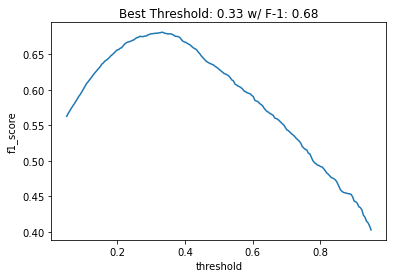

In [40]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)


## 1NN II

In [41]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.6808340727595386
Recall: 0.7250307096286497
F1-Score: 0.7022376790372031


## Floresta Aleatória II

In [42]:
stump_fit = RandomForestClassifier(
    n_estimators=100, max_depth=20, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20)

In [43]:
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.7193072702331962
Recall: 0.7927808749881886
F1-Score: 0.7542590012136468


## EDA III
Chegamos em um bom resultado com o último algoritmo de floresta aleatória, mas ainda temos algumas variáveis continuas em nosso dataset que não forem utilizadas. Vamos utilizar os resíduos desse último modelo como ponto de partida para entender se, adicionando mais variáveis, podemos deixar nosso modelo final melhor ainda.

Esta será a última etapa antes de implantarmos o ajuste de  hiperparâmetros.

In [44]:
train_tb_hotel_fd["pred_fa"] = stump_fit.predict(X_train)


In [45]:
train_tb_hotel_fd["erro"] = np.where(
    train_tb_hotel_fd["is_cancelled"] == train_tb_hotel_fd["pred_fa"], 0, 1
)


In [46]:
train_tb_hotel_fd.columns


Index(['hotel', 'is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'arrival_date', 'id_booking',
       'arrival_date_month', 'arrival_date_year', 'is_agent', 'is_company',
       'log_lead_time', 'reservation_type', 'grouped_country', 'high_season',
       'pred_m1', 'C0', 'C1', 'C2', 'C3', 'C4', 'pred_fa', 'erro'],
      dtype='object')

In [54]:
untested_var = [
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "is_repeated_guest",
    "previous_cancellations",
    # "previous_bookings_not_canceled",
    "adults",
    "children",
    "babies",
    "booking_changes",
    "adr",
    "required_car_parking_spaces",
    "total_of_special_requests",
]


Como ainda temos muitas variáveis fora do modelo, vamos iniciar nossa investigação de quais podem contribuir para o modelo final utilizando uma regressão logística para entender quais variáveis tem um impacto estatisticamente relevante (valor-p < 0.05) sobre o erro do nosso modelo. Comentei a linha das variáveis acima para evitar um erro de matriz singular: este tipo de erro acontece quando existe um grave problema de colinearidade em nossos dados (no caso atual entre as variáveis de bookings anteriores).

In [56]:
import statsmodels.api as sm

scaler_eda = StandardScaler()
scaler_eda.fit(train_tb_hotel_fd[untested_var].fillna(0))
X_eda = sm.add_constant(train_tb_hotel_fd[untested_var])
y_eda = train_tb_hotel_fd["erro"]

logit_mod = sm.Logit(y_eda, X_eda)
logit_res = logit_mod.fit()
print(logit_res.summary())


Optimization terminated successfully.
         Current function value: 0.553828
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   erro   No. Observations:                84626
Model:                          Logit   Df Residuals:                    84614
Method:                           MLE   Df Model:                           11
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.1601
Time:                        16:34:31   Log-Likelihood:                -46868.
converged:                       True   LL-Null:                       -55804.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1682      0.035    -33.545      0.000  

O modelo acima indica que quase todas as variáveis continuas que estão de fora tem impacto relevante sobre o erro do modelo anterior! Isso nos diz que devemos considera-las, seja em sua forma atual seja através de alguma transformação em nosso modelo. Vamos investigar a distribuição de cada uma dessas variáveis e a sua estrutura de correlação.

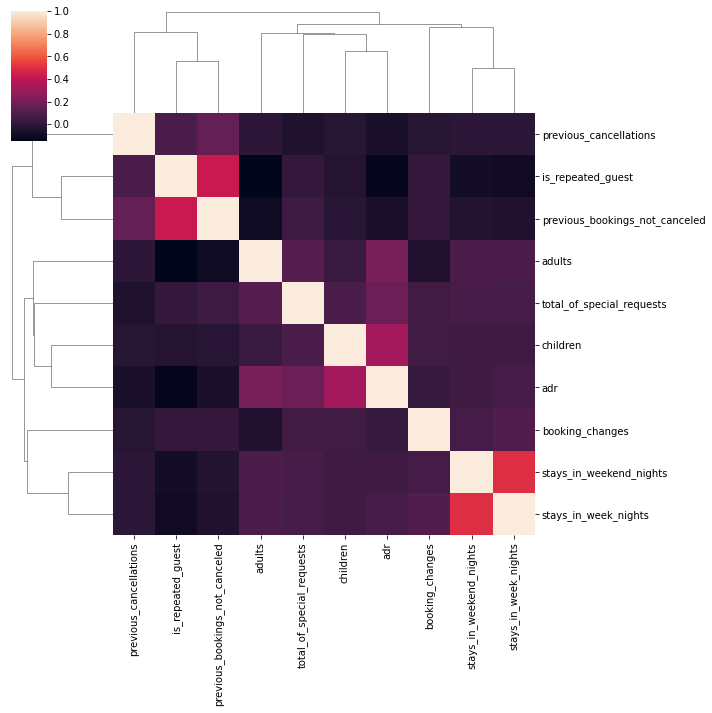

In [57]:
# Vamos criar uma nova lista apenas com as variáveis que se mostraram relevantes
rel_var = [
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "adults",
    "children",
    "booking_changes",
    "adr",
    "total_of_special_requests",
]
sns.clustermap(data=train_tb_hotel_fd[rel_var].corr())


Lendo o dendograma acima podemos ver que temos 4 grandes grupos de variáveis:

1. `previous_cancellations` + `is_repeated_guest` + `previous_bookings_not_cancelled`
1. `adults` + `total_of_special_requests` + `children` + `adr`
1. `booking_changes`
1. `stays_in_weekend_nights` + `stays_in_week_nights`

O **primeiro grupo é muito bem definido**, representando o histórico de clientes que já fizeram reservas. O **segundo é um grupo menos bem definido** mas a variável ADR nos dá uma dica: o número de pessoas na reserva e o tamanho desta (o ADR deve ser proporcional ao número de pessoas total e ao número de requisitos especiais). O **terceiro grupo** é composto apenas pela variável `booking_changes`. O **quarto grupo é muito bem definido**, sendo o tempo de estadia da reserva (noites totais e o mix entre finais de semana e dias de semana)

Podemos ver duas transformações claras a partir da análise acima:

1. Converter as variáveis `stays_in_weekend_nights` e `stays_in_week_nights` em `total_stays` (`stays_in_weekend_nights + stays_in_week_nights`) e `per_weekend` (`stays_in_weekend_nights / total_stays`). Dessa forma representamos o comprimento da reserva assim como a distribuição desta entre finais de semana e dias de semana.
1. Converter a variável `adr` em `adr_per_guest` através da transformação `adr/(adults + children)`
1. Converter as variáveis `adults` e `children` em `num_guests` - imaginando que bebês não contribuem para o preço da reserva diretamente, apenas através de pedidos especiais (como guardas de cama ou berços).
1. Criar as variáveis binárias `has_cancelled` (= 1 quando `previous_cancellations` > 0) e `has_fulfilled` (= 1 quando `previous_bookings_not_canceled` > 0)

Vamos incluir essas transformações na nossa função de transformação.

In [60]:
def transform_data_v2(hotel_data):
    tb_hotel = hotel_data.copy()
    tb_hotel["arrival_date"] = pd.to_datetime(tb_hotel["arrival_date"])
    tb_hotel["arrival_date_month"] = tb_hotel["arrival_date"].dt.month
    tb_hotel["arrival_date_year"] = tb_hotel["arrival_date"].dt.year
    tb_hotel["is_agent"] = np.where(tb_hotel["agent"].isna(), False, True)
    tb_hotel["is_company"] = np.where(tb_hotel["company"].isna(), False, True)
    tb_hotel["log_lead_time"] = np.log(tb_hotel["lead_time"] + 1)
    tb_hotel["reservation_type"] = np.where(
        (tb_hotel["lead_time"] + 1) < 10, "last_minute", "scheduled"
    )
    tb_hotel = tb_hotel.drop(["company", "agent"], axis=1)
    tb_hotel["total_stays"] = (
        tb_hotel["stays_in_weekend_nights"] + tb_hotel["stays_in_week_nights"]
    )
    tb_hotel["per_weekend"] = (
        tb_hotel["stays_in_weekend_nights"] / tb_hotel["total_stays"]
    )
    tb_hotel["num_guests"] = tb_hotel["adults"] + tb_hotel["children"]
    tb_hotel["per_child"] = tb_hotel["children"] / tb_hotel["num_guests"]
    tb_hotel["adr_per_guest"] = tb_hotel["adr"] / tb_hotel["num_guests"]
    tb_hotel["has_cancelled"] = np.where(tb_hotel["previous_cancellations"] > 0, 1, 0)
    tb_hotel["has_fulfilled"] = np.where(
        tb_hotel["previous_bookings_not_canceled"] > 0, 1, 0
    )
    tb_hotel = tb_hotel.dropna()
    return tb_hotel


## Modelos Finais
Agora podemos proceder na construção e otimização dos ultimos modelos. Neste momento implantamos a tunagem automatica de hiperparâmetros.

In [61]:
# Transformção direta de variáveis
train_tb_hotel_t = transform_data_v2(train_tb_hotel)
test_tb_hotel_t = transform_data_v2(test_tb_hotel)
# Criação dos indices de sazonalidade por país e mês
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel_t, tb_gc, tb_season)
test_tb_hotel_f = transform_country(test_tb_hotel_t, tb_gc, tb_season)
# Criação dos componentes de variáveis categóricas relevantes
ohe_fit, imp_var, nmf_fit = estimate_nmf(train_tb_hotel_f)
train_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, train_tb_hotel_f)
test_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, test_tb_hotel_f)


N Comp.: 1 F1: 0.0
N Comp.: 2 F1: 0.0
N Comp.: 3 F1: 0.5415696707682075
N Comp.: 4 F1: 0.49094063222821893
N Comp.: 5 F1: 0.6030963415836702
Best N: 5


In [62]:
model_desc = """is_cancelled ~ log_lead_time : reservation_type * is_company * high_season + 
                C0 + C1 + C2 + C3 + C4 +
                total_stays * per_weekend + num_guests * per_child + adr_per_guest + has_cancelled + has_fulfilled"""
y_train, X_train = patsy.dmatrices(
    model_desc,
    data=train_tb_hotel_fd,
)
y_test, X_test = patsy.dmatrices(
    model_desc,
    data=test_tb_hotel_fd,
)
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

### Regressão Logística III

Vamos começar reconstruindo nosso baseline a partir do nosso conjunto completo de features.

In [80]:
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.7932665553700612
Recall: 0.5391452344931922
F1-Score: 0.6419725287097501


Text(0.5, 1.0, 'Best Threshold: 0.31 w/ F-1: 0.7')

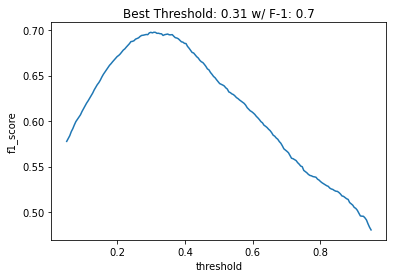

In [81]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)


### Gradient Boosting I

In [82]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (
    HalvingRandomSearchCV,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.ensemble import GradientBoostingClassifier


In [84]:
max_depth = [int(x) for x in np.linspace(1, 20, 10)]
n_estimators = [int(x) for x in np.linspace(100, 2000, 50)]
learning_rate = np.linspace(0.001, 1, 20)
param_distrib = {
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "n_estimators": n_estimators,
}
estim = GradientBoostingClassifier()
clf_fit = HalvingRandomSearchCV(
    estim, param_distrib, min_resources=1000, verbose=3, scoring="f1"
)
clf_fit.fit(X_train, y_train)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1000
max_resources_: 84047
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 84
n_resources: 1000
Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END learning_rate=0.3164736842105263, max_depth=11, n_estimators=1534;, score=(train=0.998, test=0.597) total time=   3.4s
[CV 2/5] END learning_rate=0.3164736842105263, max_depth=11, n_estimators=1534;, score=(train=0.998, test=0.705) total time=   3.7s
[CV 3/5] END learning_rate=0.3164736842105263, max_depth=11, n_estimators=1534;, score=(train=0.998, test=0.639) total time=   3.3s
[CV 4/5] END learning_rate=0.3164736842105263, max_depth=11, n_estimators=1534;, score=(train=1.000, test=0.573) total time=   0.9s
[CV 5/5] END learning_rate=0.3164736842105263, max_depth=11, n_estimators=1534;, score=(train=1.000, test=0.295) total time=   0.8s
[CV 1/5] END learning_rate=0.2113157894736842, max_depth=5, n_estimators=12

KeyboardInterrupt: 

In [181]:
test_pred = clf_fit.predict(X_test)
train_pred = clf_fit.predict(X_train)
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"Test F1-Score: {f1_score(y_test, test_pred)}")
print(f"Train F1-Score: {f1_score(y_train, train_pred)}")


Precision: 0.6899078037537043
Recall: 0.8057879050091338
F1-Score: 0.7433589072686151


In [83]:
import xgboost

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]
